# Exploratory Data Analysis(EDA) of Aspiring Mind Employment Outcome 2015 (AMEO) Dataset

### Data visualization and pre-processing of Aspiring Minds' Employability Outcomes 2015 (AMEO 2015) Dataset using Python.

# About the dataset

The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate

In [204]:
#############Importing all modules and data###########

In [205]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set_style("whitegrid")
data=pd.read_excel('aspiring_minds_employability_outcomes_2015 .xlsx')

In [206]:
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [207]:
data.shape

(3998, 39)

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [209]:
data.set_index("ID" ,inplace=True)
data.head(5)

,Unnamed: 0,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,,,,,,,,,,,,,,,,,,,,,
203097,train,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
579905,train,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
810601,train,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
267447,train,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
343523,train,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


### Data Cleaning

In [210]:
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)##Dropping the unnecessary column##########3

In [211]:
data

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,,,,,,,,,,,,,,,,,,,,,
203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615


In [212]:
data['DOB']=pd.to_datetime(data['DOB'])#converting DOB column to date datatype

In [213]:
data['DOB']

ID
203097   1990-02-19
579905   1989-10-04
810601   1992-08-03
267447   1989-12-05
343523   1991-02-27
            ...    
47916    1987-04-15
752781   1992-08-27
355888   1991-07-03
947111   1992-03-20
324966   1991-02-26
Name: DOB, Length: 3998, dtype: datetime64[ns]

In [214]:
data['DOJ']=pd.to_datetime(data['DOJ'])#converting DOJ column to date datatype

In [215]:
data['12graduation']=pd.to_datetime(data['12graduation'])

In [216]:
data['GraduationYear']=pd.to_datetime(data['GraduationYear'])

In [217]:
from datetime import date
data['DOL']=data['DOL'].replace('present', date.today())

In [218]:
data['DOL']=pd.to_datetime(data['DOL'])

In [219]:
missing_values=[-1,'n/a']
data=data.replace(missing_values,np.NaN)
data

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,,,,,,,,,,,,,,,,,,,,,
203097,420000.0,2012-06-01,2022-08-20,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",1970-01-01 00:00:00.000002007,...,NaN,NaN,NaN,NaN,NaN,0.9737,0.8128,0.5269,1.35490,-0.4455
579905,500000.0,2013-09-01,2022-08-20,assistant manager,Indore,m,1989-10-04,85.40,cbse,1970-01-01 00:00:00.000002007,...,NaN,NaN,NaN,NaN,NaN,-0.7335,0.3789,1.2396,-0.10760,0.8637
810601,325000.0,2014-06-01,2022-08-20,systems engineer,Chennai,f,1992-08-03,85.00,cbse,1970-01-01 00:00:00.000002010,...,NaN,NaN,NaN,NaN,NaN,0.2718,1.7109,0.1637,-0.86820,0.6721
267447,1100000.0,2011-07-01,2022-08-20,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,1970-01-01 00:00:00.000002007,...,NaN,NaN,NaN,NaN,NaN,0.0464,0.3448,-0.3440,-0.40780,-0.9194
343523,200000.0,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.00,cbse,1970-01-01 00:00:00.000002008,...,NaN,NaN,NaN,NaN,NaN,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47916,280000.0,2011-10-01,2012-10-01,software engineer,New Delhi,m,1987-04-15,52.09,cbse,1970-01-01 00:00:00.000002006,...,NaN,NaN,NaN,NaN,NaN,-0.1082,0.3448,0.2366,0.64980,-0.9194
752781,100000.0,2013-07-01,2013-07-01,technical writer,Hyderabad,f,1992-08-27,90.00,state board,1970-01-01 00:00:00.000002009,...,NaN,NaN,NaN,NaN,NaN,-0.3027,0.8784,0.9322,0.77980,-0.0943
355888,320000.0,2013-07-01,2022-08-20,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",1970-01-01 00:00:00.000002008,...,NaN,NaN,NaN,NaN,NaN,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615


In [220]:
data['Dyear']=data['DOB'].dt.year

In [221]:
data['12gyear']=data['12graduation'].dt.year

In [222]:
data['gyear']=data['GraduationYear'].dt.year

In [223]:
data['12GradAge']=abs(data['12gyear']-data['Dyear'])
data['GradAge']=abs(data['gyear']-data['Dyear'])

In [224]:
(data == 0).astype(int).sum(axis=0) #counting the number of 0's per column

Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                   350
12graduation                0
12percentage                0
12board                   359
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier          2797
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                      0
ComputerProgramming         0
ElectronicsAndSemicon       0
ComputerScience             0
MechanicalEngg              0
ElectricalEngg              0
TelecomEngg                 0
CivilEngg                   0
conscientiousness           0
agreeablen

In [225]:
data.isnull().sum() #finding number of null values

Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                   461
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscientiousness           0
agreeablen

In [226]:
data['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 0, 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate sta

In [227]:
replace_list_state=['board of intermediate education,ap', 'state board',
       'mp board',  'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state board', 'stateboard', 'hsc',
       'electonincs and communication(dote)', 'karnataka pu board',
       'government polytechnic mumbai , mumbai board', 'pu board',
       'baord of intermediate education', 'apbie', 'andhra board',
       'tamilnadu stateboard',
       'west bengal council of higher secondary education',
       'cbse,new delhi', 'u p board', 'intermediate', 'biec,patna',
       'diploma in engg (e &tc) tilak maharashtra vidayapeeth',
       'hsc pune', 'pu board karnataka', 'kerala', 'gsheb',
       'up(allahabad)', 'nagpur', 'st joseph hr sec school',
       'pre university board', 'ipe', 'maharashtra', 'kea', 'apsb',
       'himachal pradesh board of school education', 'staae board',
       'international baccalaureate (ib) diploma', 'nios',
       'karnataka board of university',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'scte vt orissa', 'matriculation',
       'department of pre-university education', 'wbscte',
       'preuniversity board(karnataka)', 'jharkhand accademic council',
       'bieap', 'msbte (diploma in computer technology)',
       'jharkhand acamedic council (ranchi)',
       'department of pre-university eduction', 'biec',
       'sjrcw', ' board of intermediate', 'msbte',
       'sri sankara vidyalaya', 'chse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'state board of technical eduction panchkula', 'upbhsie', 'apbsc',
       'state board of technical education and training',
       'secondary board of rajasthan',
       'tamilnadu higher secondary education board',
       'jharkhand academic council',
       'board of intermediate education,hyderabad', 'up baord', 'pu',
       'dte', 'board of secondary education', 'pre-university',
       'board of intermediate education,andhra pradesh',
       'up board , allahabad', 'srv girls higher sec school,rasipuram',
       'intermediate board of education,andhra pradesh',
       'intermediate board examination',
       'department of pre-university education, bangalore',
       'stmiras college for girls', 'mbose',
       'department of pre-university education(government of karnataka)',
       'dpue', 'msbte pune', 'board of school education harayana',
       'sbte, jharkhand', 'bihar intermediate education council, patna',
       'higher secondary', 's j polytechnic', 'latur',
       'board of secondary education, rajasthan', 'jyoti nivas', 'pseb',
       'biec-patna', 'board of intermediate education,andra pradesh',
       'chse,orissa', 'pre-university board', 'mp', 'intermediate board',
       'govt of karnataka department of pre-university education',
       'karnataka education board',
       'board of secondary school of education', 'pu board ,karnataka',
       'karnataka secondary education board', 'karnataka sslc',
       'board of intermediate ap', 'u p', 'state board of karnataka',
       'directorate of technical education,banglore', 'matric board',
       'andhpradesh board of intermediate education',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'bte up', 'scte and vt ,orissa', 'hbsc',
       'jawahar higher secondary school', 'nagpur board', 'bsemp',
       'board of intermediate education, andhra pradesh',
       'board of higher secondary orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of intermediate education:ap,hyderabad', 'science college',
       'karnatak pu board', 'aissce', 'pre university board of karnataka',
       'bihar', 'kerala state board', 'uo board', 
       'karnataka board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'jaycee matriculation school',
       'board of higher secondary examination, kerala',
       'uttaranchal state board', 'intermidiate', 'bciec,patna', 'bice',
       'karnataka state', 'state broad', 'wbbhse', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'gseb/technical education board', 'msbshse,pune',
       'tamilnadu state board', 'board of technical education',
       'kerala university', 'uttaranchal shiksha avam pariksha parishad',
       'chse(concil of higher secondary education)',
       'bright way college, (up board)', 'board of intermidiate',
       'higher secondary state certificate', 'karanataka secondary board',
       'maharashtra board', 'cgbse', 'diploma in computers', 'bte,delhi',
       'rajasthan board ajmer', 'mpbse', 'pune board',
       'state board of technical education', 'gshseb',
       'amravati divisional board', 'dote (diploma - computer engg)',
       'karnataka pre-university board', 'jharkhand board',
       'punjab state board of technical education & industrial training',
       'department of technical education',
       'sri chaitanya junior kalasala', 'state board (jac, ranchi)',
       'aligarh muslim university', 'tamil nadu state board', 'hse',
       'karnataka secondary education', 'state board ',
       'karnataka pre unversity board',
       'ks rangasamy institute of technology',
       'karnataka board secondary education', 'narayana junior college',
       'bteup', 'board of intermediate(bie)', 'hsc maharashtra board',
       'tamil nadu state', 'uttrakhand board', 'psbte',
       'stateboard/tamil nadu', 'intermediate council patna',
       'technical board, punchkula', 'board of intermidiate examination',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ap board', 'nashik board', 'himachal pradesh board',
       'maharashtra satate board',
       'andhra pradesh board of secondary education',
       'tamil nadu polytechnic',
       'maharashtra state board mumbai divisional board',
       'department of pre university education',
       'dav public school,hehal', 'board of intermediate education, ap',
       'rajasthan board of secondary education',
       'department of technical education, bangalore', 'chse,odisha',
       'maharashtra nasik board',
       'west bengal council of higher secondary examination (wbchse)',
       'holy cross matriculation hr sec school', 'cbsc',
       'pu  board karnataka', 'biec patna', 'kolhapur', 'bseb, patna',
       'up board allahabad', 'nagpur board,nagpur', 'diploma(msbte)',
       'dav public school', 'pre university board, karnataka',
       'ssm srsecschool', 'state bord', 'jstb,jharkhand',
       'intermediate board of education', 'mp board bhopal', 'pub',
       'madhya pradesh board', 'bihar intermediate education council',
       'west bengal council of higher secondary eucation',
        'mpc',
       'certificate for higher secondary education (chse)orissa',
       'maharashtra state board for hsc',
       'board of intermeadiate education', 'latur board',
       'andhra pradesh', 'karnataka pre-university',
       'lucknow public college', 'nagpur divisional board',
       'ap intermediate board', 'cgbse raipur', 'uttranchal board',
       'jiec', 
       'bihar school examination board patna',
       'state board of technical education harayana', 'mp-bse',
       'up bourd', 'dav public school sec 14',
       'haryana state board of technical education chandigarh',
       'council for indian school certificate examination',
       'jaswant modern school', 'madhya pradesh open school',
       'aurangabad board', 'j&k state board of school education',
       'diploma ( maharashtra state board of technical education)',
       'board of technicaleducation ,delhi',
       'maharashtra state boar of secondary and higher secondary education',
       'hslc (tamil nadu state board)',
       'karnataka state examination board', 'puboard', 'nasik',
       'west bengal board of higher secondary education',
       'up board,allahabad', 'board of intrmediate education,ap', 
       'karnataka state pre- university board',
       'state board - west bengal council of higher secondary education : wbchse',
       'maharashtra state board of secondary & higher secondary education',
       'biec, patna', 'state syllabus', 'cbse board', 'scte&vt',
       'board of intermediate,ap',
       'secnior secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)',
       'board of intermidiate education,ap',
       'board of high school and intermediate education uttarpradesh',
       'higher secondary education',
       'board fo intermediate education, ap', 'intermedite',
       'ap board for intermediate education', 'ahsec',
       'punjab state board of technical education & industrial training, chandigarh',
       'state board - tamilnadu', 'jharkhand acedemic council',
       'scte & vt (diploma)', 'karnataka pu',
       'board of intmediate education ap', 'up-board',
       'boardofintermediate','up bord',
                    'andhra pradesh state board',
                   'gujarat board','karnataka state education examination board','kerala state technical education',
                    'state boardmp board ',
                   'gujarat state board','ap state board']

In [228]:
#replacing the redundant values of the 12board column with 'state','cbse','icse' and 'n/a'
for i in replace_list_state:
    data['12board'].replace(i,'state',inplace=True)

replace_list_cbse=['cbse', 
       'all india board', 
       'central board of secondary education, new delhi', 'cbese']
for i in replace_list_cbse:
    data['12board'].replace(i,'cbse',inplace=True)

replace_list_icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse',
       'isc board , new delhi']
for i in replace_list_icse:
    data['12board'].replace(i,'icse',inplace=True)
data['12board'].replace(0,np.NaN,inplace=True)
data['12board'].replace('n/a',np.NaN,inplace=True)

data['12board'].unique()

array(['state', 'cbse', 'icse', nan, 'intermideate'], dtype=object)

In [229]:
replace_list_ssc=['board ofsecondary education,ap','karnataka secondary school of examination','bse',
                  'state board of secondary education, andhra pradesh','board of secondary education(bse) orissa',
                  'little jacky matric higher secondary school','bsc,orissa','matriculation board',
                  'haryana board of school education,(hbse)','j & k bord','metric','kseeb','maticulation',
                  'karnataka secondory education board','sslc','board secondary  education','mumbai board','kseb',
                  'wbbse','west bengal board of secondary education','jharkhand secondary examination board,ranchi',
                  'sss pune','bseb,patna',
                  'seba',
       'punjab school education board, mohali', 'hse,board',
       'board of ssc education andhra pradesh', 'bse,odisha', 'karnataka secondary eduction',
       'secondary education board of rajasthan', 'apsche',
       'board of  secondary education',
       'board of secondary education - andhra pradesh',
                  'karnataka education board (keeb)',
       'state board of secondary education( ssc)',
       'don bosco maatriculation school',
       'karnataka state secondary education board',
       'certificate of middle years program of ib',
       'karnataka board of secondary education',
       'board of secendary education orissa',
       'karantaka secondary education and examination borad',
       'kseeb(karnataka secondary education examination board)',
                  'state(karnataka board)',
       'jharkhand secondary examination board (ranchi)',
       'karnataka secondary education examination board', 'delhi board',
       'mirza ahmed ali baig', 'jseb', 'bse, odisha',
       'tamilnadu matriculation board', 'jharkhand secondary board',
       'board of secondary education,andhara pradesh',
       'state board of secondary education,andhra pradesh',
       'stjosephs girls higher sec school,dindigul',
       'education board of kerala', 'board of ssc',
       'maharashtra state board pune', 'secondary school cerfificate',
       'maharashtra sate board', 'ksseb',
       'bihar examination board, patna', 'state borad hp', 'cluny',
       'bsepatna', 'up borad', 'ssc board of andrapradesh', 'matric',
       'bse,orissa', 'ssc-andhra pradesh', 'mhsbse',
       'karnataka sslc board bangalore', 'karnataka',
       'secondary school of education', 'karnataka secondary board',
       'andhra pradesh board ssc', 'hse,orissa', 'national public school',
       'board of secondary education, andhra pradesh',
       'board of secondary education orissa',
       'board of secondary education,ap',
       'board of secondary education,andhra pradesh',
       'jawahar navodaya vidyalaya', 'aisse',
       'karnataka board of higher education',
       'bharathi matriculation school', 'wbbsce', 'mp state board',
       'seba(assam)', 'anglo indian', 'bse(board of secondary education)',
       'school secondary education, andhra pradesh',
       'secondary state certificate',
       'maharashtra state board of secondary and higher secondary education,pune',
       'stmary higher secondary', 'secondary school certificate', 'cbse ',
       'board of secondary education,orissa',
                  'maharashtra state board,pune', 'kiran english medium high school',
       'sarada high scchool',
       'kalaimagal matriculation higher secondary school',
       'maharastra board', 'sslc board', 'ssc maharashtra board',
       'bihar secondary education board,patna',
       'haryana board of school education',
       'ksseb(karnataka state board)',
       'jharkhand secondary education board',
       'state board of secondary education, ap', 'hsce',
       'board of secondary education,odisha',
       'west bengal board of secondary examination (wbbse)', 'apssc',
       'bseb patna', 'biharboard', 'pune', 'gyan bharati school',
                  'rbse,ajmer',
       'board of secondaray education', 'secondary school education',
       'jbse,jharkhand', 'bihar school examination board',
       'west bengal board of secondary eucation',
                  'board of secondary education (bse) orissa',
       'maharashtra state board for ssc',
       'board of secondary school education',
                   'ksbe', 'sslc,karnataka',
       'board of school education haryana',
       'maharashtra state board of secondary and higher secondary education',
       'ssc regular', 'west bengal  board of secondary education',
       'bseb ,patna',
       'state board - west bengal board of secondary education : wbbse',
       'ap state board for secondary education'
                 
                 ]

In [230]:
#replacing the redundant values of the 12board column with 'state','cbse','icse' and 'n/a'
for i in replace_list_state:
    data['10board'].replace(i,'state',inplace=True)
    
for i in replace_list_ssc:
    data['10board'].replace(i,'ssc',inplace=True)
    
replace_list_cbse=['cbse',  'cbse[gulf zone]',
       'all india board', 'delhi public school',
       'central board of secondary education, new delhi', 'cbese']
for i in replace_list_cbse:
    data['10board'].replace(i,'cbse',inplace=True)

replace_list_icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse','icse board , new delhi',
       'isc board , new delhi','icse board',"stmary's convent inter college"]
for i in replace_list_icse:
    data['10board'].replace(i,'icse',inplace=True)

data['10board'].replace('n/a',np.NaN,inplace=True)
data['10board'].replace(0,np.NaN,inplace=True)

data['10board'].unique()

array(['ssc', 'cbse', 'state', 'icse', nan], dtype=object)

In [231]:
data['Degree'].unique()

array(['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)'],
      dtype=object)

In [232]:
data.dtypes

Salary                          float64
DOJ                      datetime64[ns]
DOL                      datetime64[ns]
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation             datetime64[ns]
12percentage                    float64
12board                          object
CollegeID                       float64
CollegeTier                     float64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                   float64
CollegeCityTier                 float64
CollegeState                     object
GraduationYear           datetime64[ns]
English                         float64
Logical                         float64
Quant                           float64
Domain                          float64


In [233]:
missing_values=[-1,'n/a',0]
data=data.replace(missing_values,np.NaN)
data

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Dyear,12gyear,gyear,12GradAge,GradAge
ID,,,,,,,,,,,,,,,,,,,,,
203097,420000.0,2012-06-01,2022-08-20,senior quality engineer,Bangalore,f,1990-02-19,84.30,ssc,1970-01-01 00:00:00.000002007,...,0.9737,0.8128,0.5269,1.35490,-0.4455,1990,1970,1970,20,20
579905,500000.0,2013-09-01,2022-08-20,assistant manager,Indore,m,1989-10-04,85.40,cbse,1970-01-01 00:00:00.000002007,...,-0.7335,0.3789,1.2396,-0.10760,0.8637,1989,1970,1970,19,19
810601,325000.0,2014-06-01,2022-08-20,systems engineer,Chennai,f,1992-08-03,85.00,cbse,1970-01-01 00:00:00.000002010,...,0.2718,1.7109,0.1637,-0.86820,0.6721,1992,1970,1970,22,22
267447,1100000.0,2011-07-01,2022-08-20,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,1970-01-01 00:00:00.000002007,...,0.0464,0.3448,-0.3440,-0.40780,-0.9194,1989,1970,1970,19,19
343523,200000.0,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.00,cbse,1970-01-01 00:00:00.000002008,...,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1991,1970,1970,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47916,280000.0,2011-10-01,2012-10-01,software engineer,New Delhi,m,1987-04-15,52.09,cbse,1970-01-01 00:00:00.000002006,...,-0.1082,0.3448,0.2366,0.64980,-0.9194,1987,1970,1970,17,17
752781,100000.0,2013-07-01,2013-07-01,technical writer,Hyderabad,f,1992-08-27,90.00,state,1970-01-01 00:00:00.000002009,...,-0.3027,0.8784,0.9322,0.77980,-0.0943,1992,1970,1970,22,22
355888,320000.0,2013-07-01,2022-08-20,associate software engineer,Bangalore,m,1991-07-03,81.86,ssc,1970-01-01 00:00:00.000002008,...,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,1991,1970,1970,21,21


In [234]:
data['JobCity'].fillna(data['JobCity'].mode()[0], inplace=True)

In [235]:
data['Domain'].fillna(data['Domain'].mode()[0], inplace=True)

In [236]:
data['10board'].fillna(data['10board'].mode()[0], inplace=True)

In [237]:
data['12board'].fillna(data['12board'].mode()[0], inplace=True)

In [238]:
data['10board'].unique()

array(['ssc', 'cbse', 'state', 'icse'], dtype=object)

In [239]:
data.isnull().sum()

Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier          2797
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                      0
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscientiousness           0
agreeablen

In [240]:
data.drop(columns=['ElectronicsAndSemicon'],axis=1,inplace=True)
data.drop(columns=['MechanicalEngg'],axis=1,inplace=True)
data.drop(columns=['ElectricalEngg'],axis=1,inplace=True)
#####Dropping the subjects other than computer programming ###########

In [241]:
data.drop(columns=['CivilEngg'],axis=1,inplace=True)
data.drop(columns=['ComputerScience'],axis=1,inplace=True)

In [242]:
data.drop(columns=['CollegeCityTier'],axis=1,inplace=True)

In [243]:
data.drop(columns=['TelecomEngg'],axis=1,inplace=True)

In [244]:
data.dtypes

Salary                          float64
DOJ                      datetime64[ns]
DOL                      datetime64[ns]
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation             datetime64[ns]
12percentage                    float64
12board                          object
CollegeID                       float64
CollegeTier                     float64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                   float64
CollegeState                     object
GraduationYear           datetime64[ns]
English                         float64
Logical                         float64
Quant                           float64
Domain                          float64
ComputerProgramming             float64


In [245]:
data.isnull().sum()

Salary                     0
DOJ                        0
DOL                        0
Designation                0
JobCity                    0
Gender                     0
DOB                        0
10percentage               0
10board                    0
12graduation               0
12percentage               0
12board                    0
CollegeID                  0
CollegeTier                0
Degree                     0
Specialization             0
collegeGPA                 0
CollegeCityID              0
CollegeState               0
GraduationYear             0
English                    0
Logical                    0
Quant                      0
Domain                     0
ComputerProgramming      868
conscientiousness          0
agreeableness              0
extraversion               0
nueroticism                0
openess_to_experience      0
Dyear                      0
12gyear                    0
gyear                      0
12GradAge                  0
GradAge       

In [246]:
data.isnull().sum()

Salary                     0
DOJ                        0
DOL                        0
Designation                0
JobCity                    0
Gender                     0
DOB                        0
10percentage               0
10board                    0
12graduation               0
12percentage               0
12board                    0
CollegeID                  0
CollegeTier                0
Degree                     0
Specialization             0
collegeGPA                 0
CollegeCityID              0
CollegeState               0
GraduationYear             0
English                    0
Logical                    0
Quant                      0
Domain                     0
ComputerProgramming      868
conscientiousness          0
agreeableness              0
extraversion               0
nueroticism                0
openess_to_experience      0
Dyear                      0
12gyear                    0
gyear                      0
12GradAge                  0
GradAge       

In [247]:
data.isnull().sum()

Salary                     0
DOJ                        0
DOL                        0
Designation                0
JobCity                    0
Gender                     0
DOB                        0
10percentage               0
10board                    0
12graduation               0
12percentage               0
12board                    0
CollegeID                  0
CollegeTier                0
Degree                     0
Specialization             0
collegeGPA                 0
CollegeCityID              0
CollegeState               0
GraduationYear             0
English                    0
Logical                    0
Quant                      0
Domain                     0
ComputerProgramming      868
conscientiousness          0
agreeableness              0
extraversion               0
nueroticism                0
openess_to_experience      0
Dyear                      0
12gyear                    0
gyear                      0
12GradAge                  0
GradAge       

In [248]:
#Checking the Specialization column deeply

<AxesSubplot:>

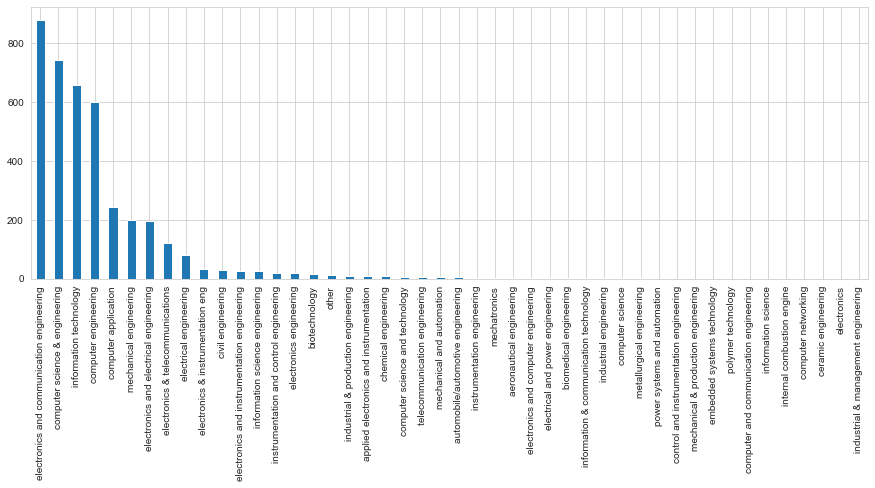

In [249]:
specialization_freq = data['Specialization'].value_counts()
specialization_freq.plot(kind='bar', figsize=(15,5))

In [250]:
specialization_map = \
{'electronics and communication engineering' : 'EC',
 'computer science & engineering' : 'CS',
 'information technology' : 'CS' ,
 'computer engineering' : 'CS',
 'computer application' : 'CS',
 'mechanical engineering' : 'ME',
 'electronics and electrical engineering' : 'EC',
 'electronics & telecommunications' : 'EC',
 'electrical engineering' : 'EL',
 'electronics & instrumentation eng' : 'EC',
 'civil engineering' : 'CE',
 'electronics and instrumentation engineering' : 'EC',
 'information science engineering' : 'CS',
 'instrumentation and control engineering' : 'EC',
 'electronics engineering' : 'EC',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'EC',
 'computer science and technology' : 'CS',
 'telecommunication engineering' : 'EC',
 'mechanical and automation' : 'ME',
 'automobile/automotive engineering' : 'ME',
 'instrumentation engineering' : 'EC',
 'mechatronics' : 'ME',
 'electronics and computer engineering' : 'CS',
 'aeronautical engineering' : 'ME',
 'computer science' : 'CS',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'EC',
 'electrical and power engineering' : 'EL',
 'industrial & management engineering' : 'other',
 'computer networking' : 'CS',
 'embedded systems technology' : 'EC',
 'power systems and automation' : 'EL',
 'computer and communication engineering' : 'CS',
 'information science' : 'CS',
 'internal combustion engine' : 'ME',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'ME',
 'control and instrumentation engineering' : 'EC',
 'polymer technology' : 'other',
 'electronics' : 'EC'}

['CS' 'EC' 'ME' 'EL' 'CE' 'other']


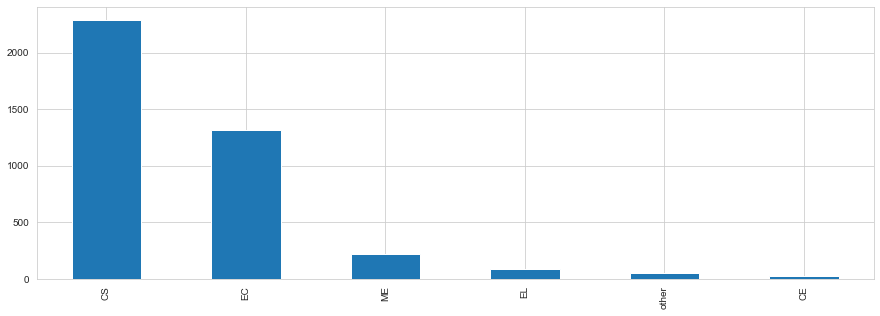

In [251]:
data['Specialization'] = data['Specialization'].map(specialization_map)

data['Specialization'].value_counts().plot(kind='bar', figsize=(15,5))

print(data['Specialization'].unique())

In [252]:
#'CS Branch strength' is more compare to all other branches.

In [253]:
num_males = data['Gender'].where(data['Gender'] == 'm').count()
num_females = data['Gender'].where(data['Gender'] == 'f').count()
print('Number of male candidates : {}'.format(num_males))
print('Number of female candidates : {}'.format(num_females))
print('Male to Female ratio: {:.2f}'.format(num_males/num_females))

Number of male candidates : 3041
Number of female candidates : 957
Male to Female ratio: 3.18


<AxesSubplot:>

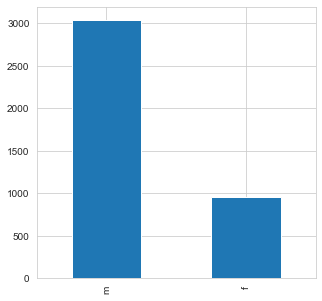

In [254]:
data['Gender'].value_counts().plot(kind='bar', figsize=(5,5))
#this is a bar plot of the gender category 
#m=Male f=Female

### There are more male group of people than Female group

In [255]:
#creating new columns 
data['AverageScore']=(data['Logical']+data['Quant']+data['English'])/3
data['Acadperf']=data['10percentage']+data['12percentage']+data['collegeGPA']/3

In [256]:
print(data['AverageScore'])

ID
203097    541.666667
579905    695.000000
810601    510.000000
267447    615.000000
343523    545.000000
             ...    
47916     391.333333
752781    453.333333
355888    471.666667
947111    393.333333
324966    514.666667
Name: AverageScore, Length: 3998, dtype: float64


### Checking for Outliers

In [257]:
from scipy import stats

z = np.abs(stats.zscore(data['Salary']))
#print(z)
threshold = 3
print(np.where(z > 3))

(array([   3,   92,  123,  166,  383,  394,  395,  500,  725,  771,  779,
        927,  943,  961, 1237, 1239, 1517, 1746, 1759, 1982, 2030, 2093,
       2109, 2152, 2182, 2216, 2230, 2412, 2472, 2493, 2541, 2565, 2764,
       2880, 3126, 3247, 3276, 3484, 3490, 3710], dtype=int64),)


In [258]:
print(len(data[z>3]))####Number of outliers#####
me=data['Salary'].median()

40


In [259]:
######Finding outliers using IQR method#####
def outliers_iqr(df,col):    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lb = q1 - (1.5*iqr)
    ub = q3 + (1.5*iqr)
    outliers = []
    for val in df[col]:
        if val < lb or val > ub:
            outliers.append(val)

    return outliers,len(outliers)

In [260]:
outliers_iqr(data, 'Salary')#####Outliers for Salary(numerical Column####)

([1100000.0,
  800000.0,
  1500000.0,
  1200000.0,
  675000.0,
  1860000.0,
  660000.0,
  700000.0,
  785000.0,
  700000.0,
  690000.0,
  700000.0,
  1110000.0,
  1200000.0,
  1000000.0,
  715000.0,
  820000.0,
  720000.0,
  2600000.0,
  715000.0,
  800000.0,
  1025000.0,
  775000.0,
  1300000.0,
  3500000.0,
  910000.0,
  730000.0,
  680000.0,
  1300000.0,
  1050000.0,
  2000000.0,
  700000.0,
  860000.0,
  800000.0,
  800000.0,
  690000.0,
  4000000.0,
  2020000.0,
  700000.0,
  700000.0,
  760000.0,
  800000.0,
  870000.0,
  2050000.0,
  700000.0,
  1320000.0,
  755000.0,
  880000.0,
  3000000.0,
  700000.0,
  720000.0,
  820000.0,
  2500000.0,
  2300000.0,
  950000.0,
  1300000.0,
  1200000.0,
  4000000.0,
  700000.0,
  700000.0,
  1800000.0,
  725000.0,
  1200000.0,
  720000.0,
  700000.0,
  930000.0,
  680000.0,
  1000000.0,
  750000.0,
  1000000.0,
  705000.0,
  1745000.0,
  2000000.0,
  1800000.0,
  850000.0,
  845000.0,
  700000.0,
  660000.0,
  820000.0,
  750000.0,
  1200000

In [261]:
outliers_iqr(data, '10percentage')#####Outliers for 10percentage#####

([50.6,
  44.16,
  44.0,
  45.6,
  48.0,
  49.0,
  48.0,
  49.0,
  48.8,
  49.0,
  49.0,
  48.5,
  48.0,
  50.6,
  43.0,
  50.0,
  49.0,
  45.33,
  46.24,
  48.0,
  50.5,
  50.0,
  50.0,
  50.66,
  46.8,
  50.0,
  50.0,
  50.0,
  46.0,
  49.9],
 30)

In [262]:
outliers_iqr(data, '12percentage')#####Outliers for 12percentage#####

([40.0], 1)

In [263]:
outliers_iqr(data, 'ComputerProgramming')##### outliers for Computerprogramming score#####

([735.0,
  155.0,
  804.0,
  715.0,
  155.0,
  135.0,
  105.0,
  165.0,
  735.0,
  135.0,
  175.0,
  125.0,
  745.0,
  125.0,
  715.0,
  185.0,
  145.0,
  175.0,
  725.0,
  840.0,
  755.0,
  175.0,
  175.0,
  185.0,
  715.0,
  145.0,
  755.0,
  175.0,
  125.0,
  115.0,
  755.0,
  185.0,
  735.0,
  155.0,
  715.0,
  165.0,
  175.0,
  725.0,
  115.0,
  165.0,
  165.0,
  145.0,
  155.0,
  725.0,
  715.0],
 45)

In [264]:
#Replacing null values with median

In [265]:
median_value=data['ComputerProgramming'].median()

data['ComputerProgramming'].fillna(value=median_value, inplace=True)#####Replacing null values for the column with median####

In [266]:
data.isnull().sum()

Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Dyear                    0
12gyear                  0
gyear                    0
12GradAge                0
GradAge                  0
AverageScore             0
Acadperf                 0
d

In [267]:
median_value=data['ComputerProgramming'].median()

data['ComputerProgramming'].fillna(value=median_value, inplace=True)

In [268]:
data_o = data[(z < 3)]
data_o.shape
data.shape   ######removing salary outliers ######

(3998, 37)

Text(0.5, 0.98, 'Specialization based on gender')

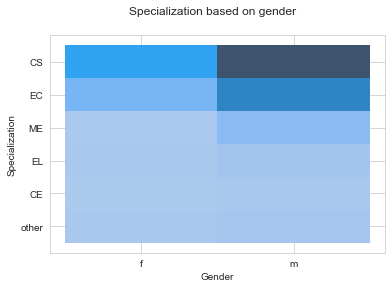

In [269]:
sns.histplot(x='Gender', y = 'Specialization', data=data)
plt.suptitle('Specialization based on gender')

In [270]:
#There are more male CS group of people than that of other groups

C:\Users\mrjdh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


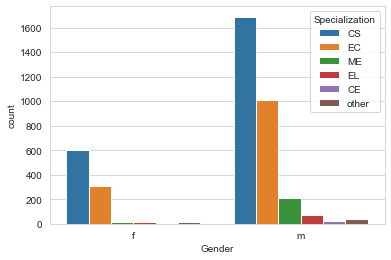

In [271]:
sns.countplot(data.Gender,hue=data.Specialization)
plt.show()

### From the above plot CS_Male group is showing morevalues

Text(0.5, 0.98, 'Salary levels by gender')

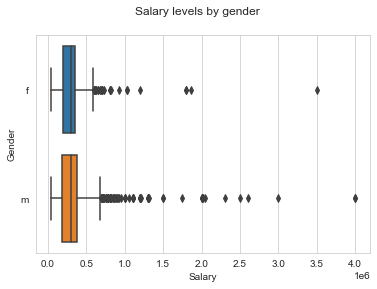

In [272]:
#boxplot visualization of salary levels by gender

sns.boxplot(x='Salary', y = 'Gender', data=data)
plt.suptitle('Salary levels by gender')

### From the above box plot Wecan say that Male group salary has more outliers

Text(0.5, 0.98, 'Salary levels by gender')

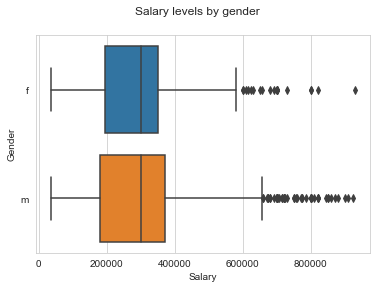

In [273]:
#boxplot visualization of salary levels by gender after removing outliers
#median salary of males is slightly greater than that of females.
#higher outliers are observed in male category. Indicating that salaries above normal are earned more by males.
sns.boxplot(x='Salary', y = 'Gender', data=data_o)
plt.suptitle('Salary levels by gender')

(array([492., 850., 814., 948., 497., 198.,  92.,  38.,  19.,  10.]),
 array([ 35000., 124500., 214000., 303500., 393000., 482500., 572000.,
        661500., 751000., 840500., 930000.]),
 <BarContainer object of 10 artists>)

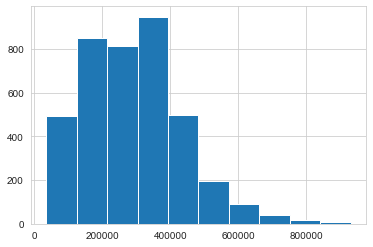

In [274]:
#histogram of salary data
plt.hist(data_o['Salary'],bins=10)

In [275]:
#The Average salary is about 400k

C:\Users\mrjdh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

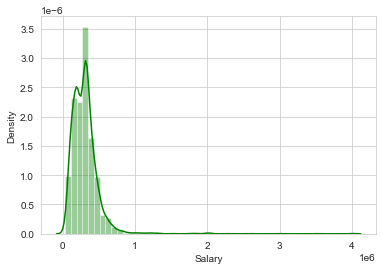

In [276]:
sns.distplot(data.Salary,hist=True,kde=True,color='g')

In [277]:
#The above plot is before removing outliers

C:\Users\mrjdh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

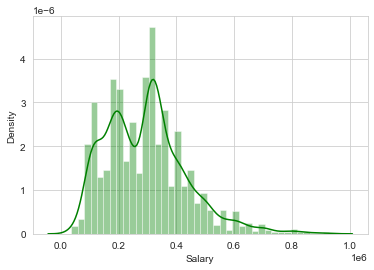

In [278]:
sns.distplot(data_o.Salary,hist=True,kde=True,color='g')

In [279]:
#After removing Outliers

C:\Users\mrjdh\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\mrjdh\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Salary vs Gender')

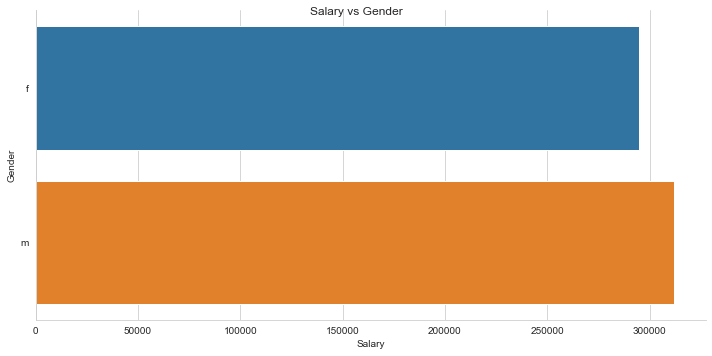

In [280]:
sns.factorplot(x='Salary', y='Gender', kind='bar', data=data, ci=None , size=5,aspect=2)
plt.suptitle('Salary vs Gender')

### Salary of Male group is more than that of Female But we can also observe that there are more outliers forMale group Salary Data

C:\Users\mrjdh\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\mrjdh\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Salary vs 12Board')

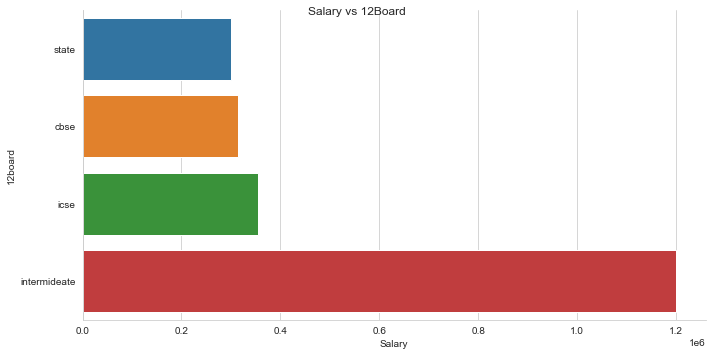

In [281]:
#bar graph of salary levels categorized based on 12th board. and ci=None suppresses error bars
#Students of icse board tend to earn higher salaries than the other two and for intermediate its high
sns.factorplot(x='Salary', y='12board', kind='bar', data=data, ci=None , size=5,aspect=2)
plt.suptitle('Salary vs 12Board')

### BEfore removing outliers For Intermediate Groups Salary is more but after removing outliers ICSE Branch is taking More outliers So Outliers are affecting much impact on Data

C:\Users\mrjdh\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\mrjdh\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Salary vs 12Board')

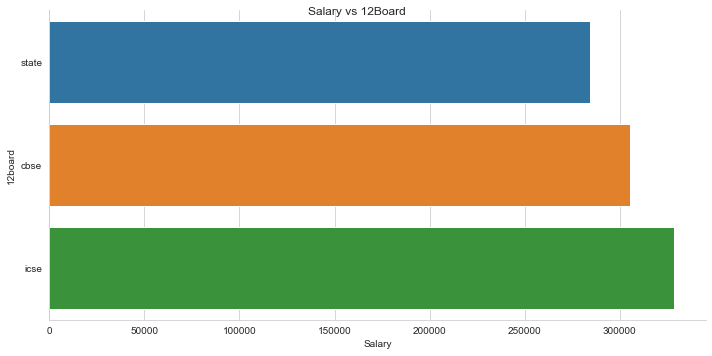

In [282]:
#bar graph of salary levels categorized based on 12th board. and ci=None suppresses error bars
#Students of icse board tend to earn higher salaries than the other two.
sns.factorplot(x='Salary', y='12board', kind='bar', data=data_o, ci=None , size=5,aspect=2)
plt.suptitle('Salary vs 12Board')

 The plot above shows students who studies in ISCE boards in 12th Class have a slightly higher salary than those of CBSE students and ICSE board students.

C:\Users\mrjdh\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\mrjdh\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Salary vs 10Board')

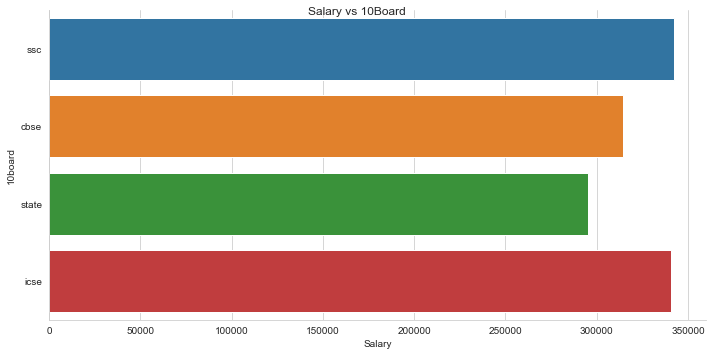

In [283]:
sns.factorplot(x='Salary', y='10board', kind='bar', data=data, ci=None , size=5,aspect=2)
plt.suptitle('Salary vs 10Board')

C:\Users\mrjdh\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\mrjdh\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Salary vs 10Board')

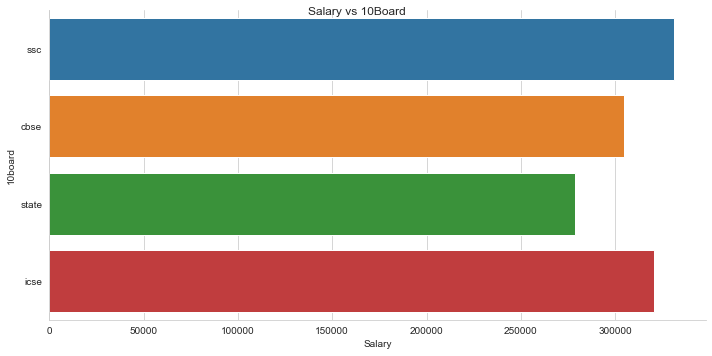

In [284]:
sns.factorplot(x='Salary', y='10board', kind='bar', data=data_o, ci=None , size=5,aspect=2)
plt.suptitle('Salary vs 10Board')

In [285]:
data['12board'].unique()

array(['state', 'cbse', 'icse', 'intermideate'], dtype=object)

<AxesSubplot:xlabel='12board', ylabel='Salary'>

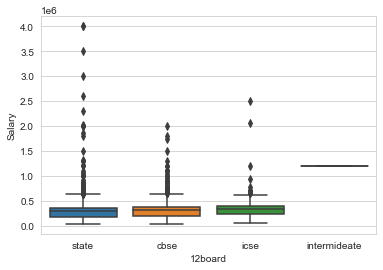

In [286]:
sns.boxplot(x='12board', y='Salary', data=data)

### As we can see 12Board salary group is affecting with outliers

<AxesSubplot:xlabel='Logical', ylabel='Salary'>

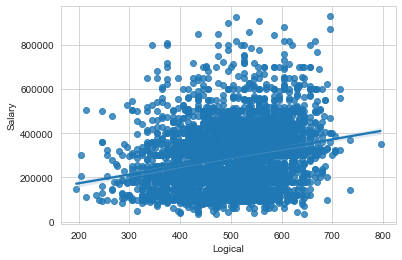

In [287]:
sns.regplot(x='Logical', y='Salary', data=data_o)

In [288]:
#There is no visible correlation between These two groups So Logical reasoning has not much affect on salary

In [289]:
data['Logical'].corr(data['Salary'])###### correlation betweeen salary and logical thinking score.

0.1792749664830866

Text(0.5, 0.98, 'Salary levels by specialization')

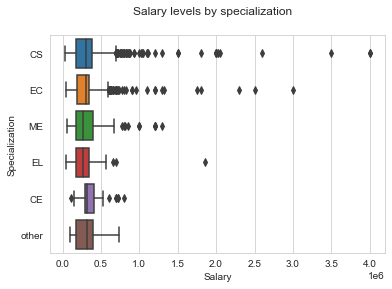

In [290]:
#boxplot visualization of salary and specialization
#it is observed that CS department has many outliers indicating higher salaries are earned by those of CS specializaton
#the median salary of EC dept is higher than others.
sns.boxplot(x='Salary', y = 'Specialization', data=data)
plt.suptitle('Salary levels by specialization')

Text(0.5, 0.98, 'Salary levels by specialization')

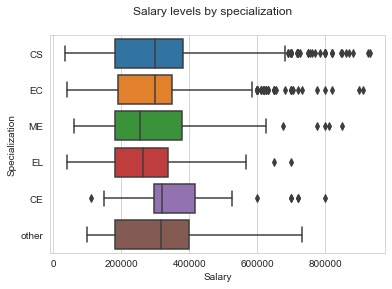

In [291]:
#boxplot visualization of salary and specialization
#it is observed that CS department has many outliers indicating higher salaries are earned by those of CS specializaton
#the median salary of EC dept is higher than others.
sns.boxplot(x='Salary', y = 'Specialization', data=data_o)
plt.suptitle('Salary levels by specialization')

In [292]:
#Outliers are affecting the Specialization Data

In [293]:
def outliers_iqr(df,col):    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lb = q1 - (1.5*iqr)
    ub = q3 + (1.5*iqr)
    outliers = []
    for val in df[col]:
        if val < lb or val > ub:
            outliers.append(val)

    return len(outliers)

In [294]:
for column in ['extraversion','openess_to_experience','Domain','agreeableness','conscientiousness','10percentage' ,'Quant','12percentage','English', 'ComputerProgramming', 'Logical']:
    print(outliers_iqr(data,column))      

40
95
0
123
39
30
25
1
15
197
18


<AxesSubplot:xlabel='ComputerProgramming', ylabel='Salary'>

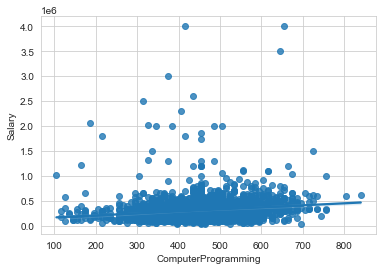

In [295]:
sns.regplot(x='ComputerProgramming', y='Salary', data=data)

<AxesSubplot:xlabel='ComputerProgramming', ylabel='Salary'>

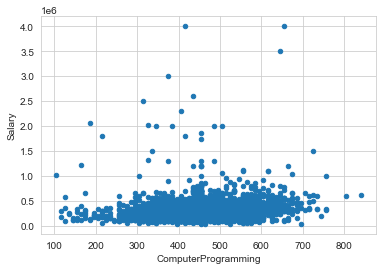

In [296]:
data.plot.scatter('ComputerProgramming','Salary')

In [297]:
data['Salary'].corr(data['ComputerProgramming'])#####correlation between salary and computer programming test score

0.1635254605097117

In [298]:

from scipy import stats

z = np.abs(stats.zscore(data['ComputerProgramming']))
#print(z)
threshold = 3
print(np.where(z > 3))

(array([   8,   43,   64,  673,  676,  716,  725,  749,  774,  805,  918,
        998, 1420, 1439, 1513, 1517, 1582, 1669, 1703, 1711, 1760, 1935,
       2009, 2037, 2082, 2090, 2155, 2168, 2175, 2469, 2472, 2574, 2676,
       2858, 3044, 3126, 3162, 3247, 3415, 3428, 3497, 3631, 3649, 3697,
       3746], dtype=int64),)


In [299]:
len(data[z>3])
me1=data['ComputerProgramming'].median()
data_c = data_o[(z < 3)]
data_c.shape
data.shape

C:\Users\mrjdh\AppData\Local\Temp/ipykernel_53784/2666126154.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_c = data_o[(z < 3)]


(3998, 37)

<AxesSubplot:xlabel='ComputerProgramming', ylabel='Salary'>

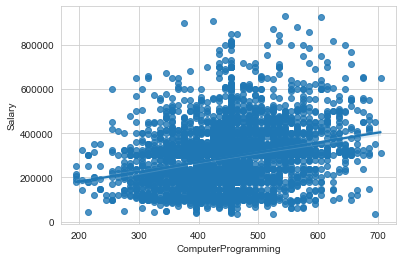

In [300]:
sns.regplot(x='ComputerProgramming', y='Salary', data=data_c)

# Distribution plots for standardized columns

In [301]:
data_std= pd.DataFrame(data, 
                       index=data.index,
                       columns=['extraversion','openess_to_experience','agreeableness','conscientiousness'])

In [302]:
data_std

,extraversion,openess_to_experience,agreeableness,conscientiousness
ID,,,,
203097,0.5269,-0.4455,0.8128,0.9737
579905,1.2396,0.8637,0.3789,-0.7335
810601,0.1637,0.6721,1.7109,0.2718
267447,-0.3440,-0.9194,0.3448,0.0464
343523,-1.0697,-0.1295,-0.2793,-0.8810
...,...,...,...,...
47916,0.2366,-0.9194,0.3448,-0.1082
752781,0.9322,-0.0943,0.8784,-0.3027
355888,-1.5051,-0.7615,-1.5273,-1.5765


In [303]:
data_std.isnull().sum()

extraversion             0
openess_to_experience    0
agreeableness            0
conscientiousness        0
dtype: int64

<AxesSubplot:ylabel='Density'>

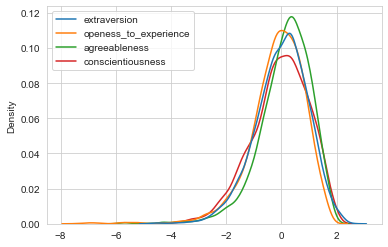

In [304]:

sns.kdeplot(data=data_std)

# Feature transformation for numerical data

In [305]:
data_num_std= pd.DataFrame(data, 
                       index=data.index,
                       columns=['Salary','10percentage','12percentage','collegeGPA','English','Logical','Quant','ComputerProgramming'])

In [306]:
data_num_std.isnull().sum()

Salary                 0
10percentage           0
12percentage           0
collegeGPA             0
English                0
Logical                0
Quant                  0
ComputerProgramming    0
dtype: int64

In [307]:
data_z = (data_num_std-data_num_std.mean())/(data_num_std.std())

In [308]:
data_z

,Salary,10percentage,12percentage,collegeGPA,English,Logical,Quant,ComputerProgramming
ID,,,,,,,,
203097,0.527881,0.647153,1.939433,0.797546,0.127224,0.961028,0.095025,-0.082630
579905,0.903932,0.758826,0.957609,-0.174619,1.842490,1.249102,2.180022,0.033680
810601,0.081322,0.718217,-0.569673,-0.181965,1.080150,0.500110,-1.172326,-0.664176
267447,3.724309,0.779130,0.830335,0.386151,1.270735,0.961028,0.912671,1.894628
343523,-0.506257,0.007569,0.212150,0.295547,0.413102,1.421946,-0.395562,0.033680
...,...,...,...,...,...,...,...,...
47916,-0.130207,-2.622844,-1.724226,-1.222696,-1.302164,-1.931233,-0.313798,-1.245722
752781,-0.976320,1.225823,1.684886,0.711839,-0.825701,-1.055489,0.176790,-1.478341
355888,0.057818,0.399441,-0.815129,-0.181965,-0.253946,-0.306497,-0.395562,-0.547867


<AxesSubplot:ylabel='Density'>

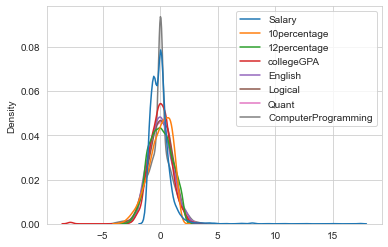

In [309]:
sns.kdeplot(data=data_z)

In [310]:
category_list=[ 'Gender', '12board', 'Degree','Specialization'
        ]
numeric_list=[ 'Salary','10percentage', '12percentage', 'collegeGPA',
        'English', 'Logical', 'Quant',
        'ComputerProgramming', 'ComputerScience', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', '12GradAge',
       'GradAge']

# feature transformation for categorical data¶

In [311]:
for feature in category_list:
    clean_data = pd.get_dummies(data, prefix=feature, columns=[feature])#####Categorical Data

In [312]:
clean_data

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,12GradAge,GradAge,AverageScore,Acadperf,Specialization_CE,Specialization_CS,Specialization_EC,Specialization_EL,Specialization_ME,Specialization_other
ID,,,,,,,,,,,,,,,,,,,,,
203097,420000.0,2012-06-01,2022-08-20,senior quality engineer,Bangalore,f,1990-02-19,84.30,ssc,1970-01-01 00:00:00.000002007,...,20,20,541.666667,206.100000,0,1,0,0,0,0
579905,500000.0,2013-09-01,2022-08-20,assistant manager,Indore,m,1989-10-04,85.40,cbse,1970-01-01 00:00:00.000002007,...,19,19,695.000000,193.753333,0,0,1,0,0,0
810601,325000.0,2014-06-01,2022-08-20,systems engineer,Chennai,f,1992-08-03,85.00,cbse,1970-01-01 00:00:00.000002010,...,22,22,510.000000,176.533333,0,1,0,0,0,0
267447,1100000.0,2011-07-01,2022-08-20,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,1970-01-01 00:00:00.000002007,...,19,19,615.000000,194.080000,0,1,0,0,0,0
343523,200000.0,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.00,cbse,1970-01-01 00:00:00.000002008,...,21,21,545.000000,179.433333,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47916,280000.0,2011-10-01,2012-10-01,software engineer,New Delhi,m,1987-04-15,52.09,cbse,1970-01-01 00:00:00.000002006,...,17,17,391.333333,128.090000,0,1,0,0,0,0
752781,100000.0,2013-07-01,2013-07-01,technical writer,Hyderabad,f,1992-08-27,90.00,state,1970-01-01 00:00:00.000002009,...,22,22,453.333333,208.766667,0,0,1,0,0,0
355888,320000.0,2013-07-01,2022-08-20,associate software engineer,Bangalore,m,1991-07-03,81.86,ssc,1970-01-01 00:00:00.000002008,...,21,21,471.666667,170.693333,0,1,0,0,0,0


In [313]:
data['Specialization'].unique()

array(['CS', 'EC', 'ME', 'EL', 'CE', 'other'], dtype=object)

In [314]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(dtype=np.int, sparse=True)
nominals = pd.DataFrame(
    onehot.fit_transform(data[['Gender', 'Specialization']])\
    .toarray(),
    columns=['f', 'm', 'CS', 'EC','ME', 'EL','CE','other'])

C:\Users\mrjdh\AppData\Local\Temp/ipykernel_53784/3143222313.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  onehot = OneHotEncoder(dtype=np.int, sparse=True)


In [315]:
nominals

,f,m,CS,EC,ME,EL,CE,other
0,1,0,0,1,0,0,0,0
1,0,1,0,0,1,0,0,0
2,1,0,0,1,0,0,0,0
3,0,1,0,1,0,0,0,0
4,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
3993,0,1,0,1,0,0,0,0
3994,1,0,0,0,1,0,0,0
3995,0,1,0,1,0,0,0,0
3996,1,0,0,1,0,0,0,0


# Feature Transformation of Categorical and numerical data with sklearn

In [355]:
categorical = data.select_dtypes(include = ['object'])

In [356]:
categorical

,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState
ID,,,,,,,,
203097,senior quality engineer,Bangalore,f,ssc,state,B.Tech/B.E.,CS,Andhra Pradesh
579905,assistant manager,Indore,m,cbse,cbse,B.Tech/B.E.,EC,Madhya Pradesh
810601,systems engineer,Chennai,f,cbse,cbse,B.Tech/B.E.,CS,Uttar Pradesh
267447,senior software engineer,Gurgaon,m,cbse,cbse,B.Tech/B.E.,CS,Delhi
343523,get,Manesar,m,cbse,cbse,B.Tech/B.E.,EC,Uttar Pradesh
...,...,...,...,...,...,...,...,...
47916,software engineer,New Delhi,m,cbse,cbse,B.Tech/B.E.,CS,Haryana
752781,technical writer,Hyderabad,f,state,state,B.Tech/B.E.,EC,Telangana
355888,associate software engineer,Bangalore,m,ssc,state,B.Tech/B.E.,CS,Orissa


In [357]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse = False)

df_cat = pd.DataFrame(enc.fit_transform(categorical),columns = enc.get_feature_names(categorical.columns))

In [358]:
df_cat.head()

,Designation_.net developer,Designation_.net web developer,Designation_account executive,Designation_account manager,Designation_admin assistant,Designation_administrative coordinator,Designation_administrative support,Designation_aircraft technician,Designation_android developer,Designation_application developer,...,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [359]:
numerical = data.select_dtypes(include = ['int64','float64'])

In [360]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

df_num = pd.DataFrame(scale.fit_transform(numerical),columns = numerical.columns)

In [361]:
df = pd.concat([df_num,df_cat], axis = 1)

In [362]:
df.head()

,Salary,10percentage,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,English,Logical,Quant,...,CollegeState_Orissa,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Sikkim,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Union Territory,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
0,0.527947,0.647233,1.939676,-0.836346,0.283282,0.797646,-0.836346,0.127240,0.961148,0.095037,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.904045,0.758921,0.957729,0.135401,0.283282,-0.174641,0.135401,1.842720,1.249258,2.180295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.081332,0.718307,-0.569744,-1.060644,0.283282,-0.181988,-1.060644,1.080285,0.500173,-1.172473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.724775,0.779227,0.830439,0.367196,-3.530054,0.386200,0.367196,1.270894,0.961148,0.912785,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.506320,0.007570,0.212176,1.293542,0.283282,0.295584,1.293542,0.413154,1.422124,-0.395612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Distribution plots for numerical data

C:\Users\mrjdh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='10percentage', ylabel='Density'>

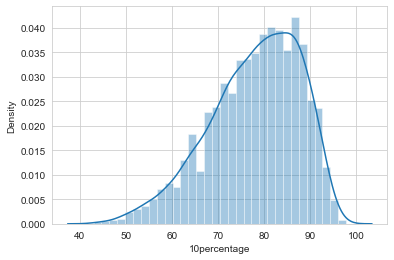

In [316]:
from seaborn import distplot
distplot(data['10percentage'])

C:\Users\mrjdh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='12percentage', ylabel='Density'>

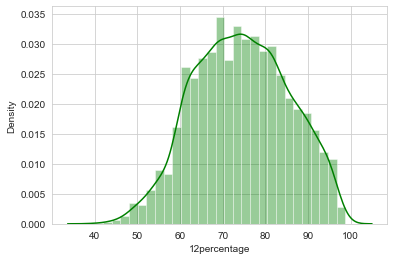

In [317]:
sns.distplot(data['12percentage'],hist=True,kde=True,color='g')

C:\Users\mrjdh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='collegeGPA', ylabel='Density'>

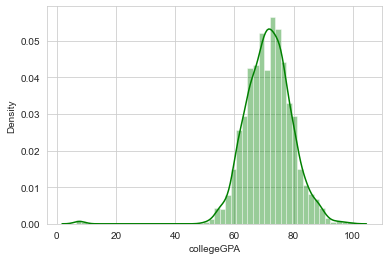

In [318]:
sns.distplot(data['collegeGPA'],hist=True,kde=True,color='g')

In [319]:
data.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeState', 'GraduationYear', 'English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Dyear', '12gyear', 'gyear', '12GradAge', 'GradAge', 'AverageScore',
       'Acadperf'],
      dtype='object')

In [320]:
data_num_dist_plots= pd.DataFrame(data, 
                       index=data.index,
                       columns=['conscientiousness','agreeableness','extraversion','neuroticism','openess_to_experience'])

C:\Users\mrjdh\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Density'>

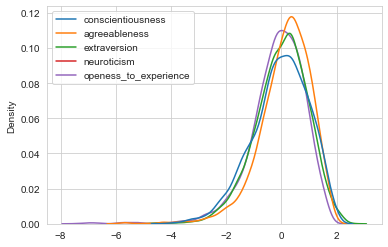

In [321]:

sns.kdeplot(data=data_num_dist_plots)

# Bi variate Analysis#

<AxesSubplot:xlabel='Salary', ylabel='collegeGPA'>

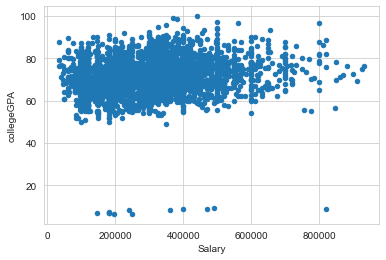

In [322]:
data_o.plot.scatter('Salary','collegeGPA')####Contineous-Contineous

In [323]:
data['Salary'].corr(data['collegeGPA'])####correlation is less than 1###

0.13010251907112563

In [324]:
data.groupby('Gender')['Salary'].mean()####Categorical-Numerical####

Gender
f    294937.304075
m    311716.211772
Name: Salary, dtype: float64

<AxesSubplot:xlabel='Gender'>

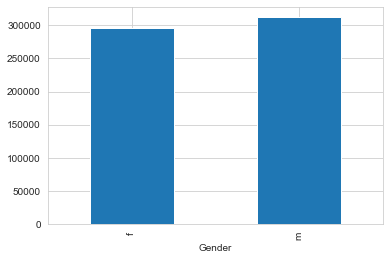

In [325]:
data.groupby('Gender')['Salary'].mean().plot.bar()

In [326]:
from scipy.stats import ttest_ind

In [327]:
males=data[data['Gender']=='m']
females=data[data['Gender']=='f']

In [328]:
males

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,extraversion,nueroticism,openess_to_experience,Dyear,12gyear,gyear,12GradAge,GradAge,AverageScore,Acadperf
ID,,,,,,,,,,,,,,,,,,,,,
579905,500000.0,2013-09-01,2022-08-20,assistant manager,Indore,m,1989-10-04,85.40,cbse,1970-01-01 00:00:00.000002007,...,1.2396,-0.10760,0.8637,1989,1970,1970,19,19,695.000000,193.753333
267447,1100000.0,2011-07-01,2022-08-20,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,1970-01-01 00:00:00.000002007,...,-0.3440,-0.40780,-0.9194,1989,1970,1970,19,19,615.000000,194.080000
343523,200000.0,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.00,cbse,1970-01-01 00:00:00.000002008,...,-1.0697,0.09163,-0.1295,1991,1970,1970,21,21,545.000000,179.433333
1027655,300000.0,2014-06-01,2022-08-20,system engineer,Hyderabad,m,1992-07-02,89.92,state,1970-01-01 00:00:00.000002010,...,-2.2954,-0.74150,-0.8608,1992,1970,1970,22,22,578.333333,202.360000
947847,300000.0,2014-08-01,2015-05-01,java software engineer,Banglore,m,1993-02-01,86.08,state,1970-01-01 00:00:00.000002010,...,-1.0379,-2.00920,-1.0872,1993,1970,1970,23,23,468.333333,177.906667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204604,300000.0,2014-09-01,2022-08-20,software engineer,Bangalore,m,1991-11-23,74.88,state,1970-01-01 00:00:00.000002010,...,1.2396,1.03330,0.6721,1991,1970,1970,21,21,493.333333,184.096667
230873,630000.0,2011-07-01,2014-10-01,systems analyst,Bangalore,m,1990-05-20,80.00,state,1970-01-01 00:00:00.000002007,...,-1.6502,-0.05520,0.0284,1990,1970,1970,20,20,435.000000,172.000000
344407,800000.0,2014-04-01,2015-04-01,manager,Rajkot,m,1990-06-22,73.00,state,1970-01-01 00:00:00.000002008,...,0.9623,0.64983,-0.4229,1990,1970,1970,20,20,425.000000,153.333333


In [329]:
females

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,extraversion,nueroticism,openess_to_experience,Dyear,12gyear,gyear,12GradAge,GradAge,AverageScore,Acadperf
ID,,,,,,,,,,,,,,,,,,,,,
203097,420000.0,2012-06-01,2022-08-20,senior quality engineer,Bangalore,f,1990-02-19,84.30,ssc,1970-01-01 00:00:00.000002007,...,0.5269,1.35490,-0.4455,1990,1970,1970,20,20,541.666667,206.100000
810601,325000.0,2014-06-01,2022-08-20,systems engineer,Chennai,f,1992-08-03,85.00,cbse,1970-01-01 00:00:00.000002010,...,0.1637,-0.86820,0.6721,1992,1970,1970,22,22,510.000000,176.533333
536517,350000.0,2013-08-01,2022-08-20,network engineer,Bangalore,f,1990-01-17,69.54,icse,1970-01-01 00:00:00.000002008,...,0.6720,-0.29020,1.2528,1990,1970,1970,20,20,453.333333,154.970000
466888,325000.0,2014-09-01,2022-08-20,software engineer,Pune,f,1990-11-30,79.00,cbse,1970-01-01 00:00:00.000002008,...,-0.2714,-0.40780,-0.1295,1990,1970,1970,20,20,455.000000,166.633333
140069,320000.0,2010-11-01,2012-09-01,software engineer,Bangalore,f,1988-07-25,91.20,ssc,1970-01-01 00:00:00.000002006,...,0.5269,-0.29020,0.3444,1988,1970,1970,18,18,478.333333,201.880000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466661,200000.0,2013-02-01,2013-07-01,data analyst,Bangalore,f,1991-05-15,74.40,state,1970-01-01 00:00:00.000002008,...,-0.0537,1.32550,0.5024,1991,1970,1970,21,21,448.000000,148.796667
204287,480000.0,2012-02-01,2022-08-20,senior systems engineer,Hyderabad,f,1989-09-04,88.00,state,1970-01-01 00:00:00.000002007,...,0.3817,-1.34780,0.8183,1989,1970,1970,19,19,454.666667,200.333333
752781,100000.0,2013-07-01,2013-07-01,technical writer,Hyderabad,f,1992-08-27,90.00,state,1970-01-01 00:00:00.000002009,...,0.9322,0.77980,-0.0943,1992,1970,1970,22,22,453.333333,208.766667


In [330]:
females.isnull().sum()

Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Dyear                    0
12gyear                  0
gyear                    0
12GradAge                0
GradAge                  0
AverageScore             0
Acadperf                 0
d

In [331]:
ttest_ind(males['Salary'],females['Salary'])

Ttest_indResult(statistic=2.128894934064978, pvalue=0.03332394177012777)

In [332]:
####mean salary of females is different than that of males ######

In [333]:
con_table=pd.crosstab(data_o['Gender'],data['Specialization'])
print(con_table)

Specialization  CE    CS    EC  EL   ME  other
Gender                                        
f                6   596   305  16   12     15
m               23  1671  1003  68  202     41


(0.0, 1500.0)

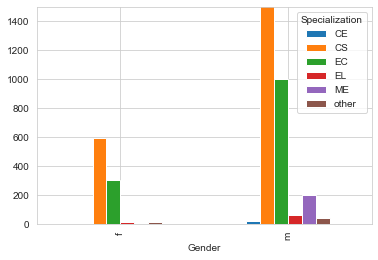

In [334]:
con_table.plot.bar()

max_y_lim =  1500
min_y_lim = 0
plt.ylim(min_y_lim, max_y_lim)

# Females are lesly  choosing some branches like mechanical engineering,EL,Computer engineering.Only they are choosing EC and CS

<AxesSubplot:>

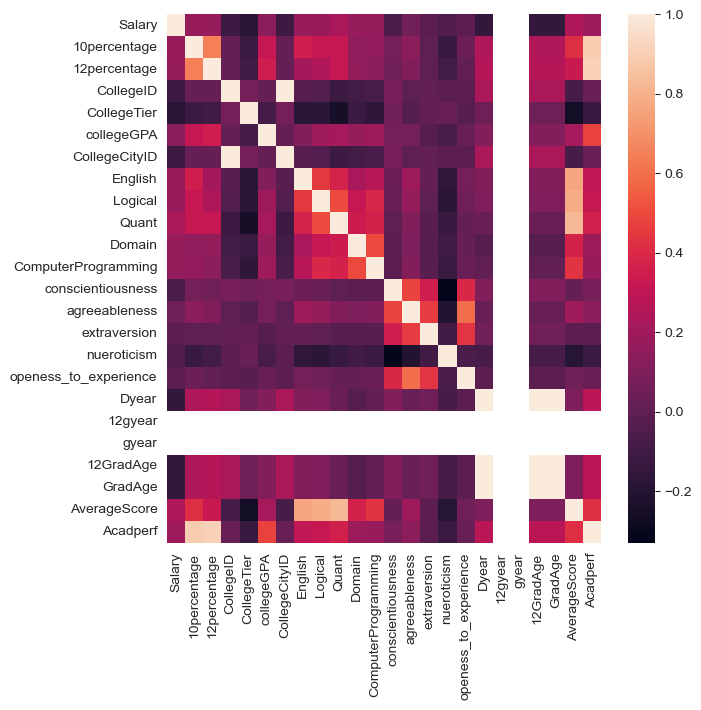

In [335]:
plt.figure(figsize= (7,7), dpi=100)
sns.heatmap(data.corr()) # plotting the correlation matrix of the dataset

In [336]:
data.corr(method='pearson', min_periods=1)

,Salary,10percentage,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,English,Logical,Quant,...,extraversion,nueroticism,openess_to_experience,Dyear,12gyear,gyear,12GradAge,GradAge,AverageScore,Acadperf
Salary,1.000000,0.177373,0.170254,-0.118690,-0.179332,0.130103,-0.118690,0.178219,0.179275,0.230627,...,-0.010213,-0.054685,-0.011312,-0.151714,NaN,NaN,-0.151714,-0.151714,0.251160,0.198125
10percentage,0.177373,1.000000,0.643378,0.021082,-0.126042,0.312538,0.021082,0.350780,0.316014,0.317640,...,-0.004679,-0.132496,0.036692,0.243880,NaN,NaN,0.243880,0.243880,0.414469,0.886306
12percentage,0.170254,0.643378,1.000000,0.022336,-0.100771,0.346137,0.022336,0.212888,0.243571,0.312413,...,-0.007486,-0.094369,0.006332,0.265781,NaN,NaN,0.265781,0.265781,0.328440,0.911308
CollegeID,-0.118690,0.021082,0.022336,1.000000,0.067054,0.017240,1.000000,-0.022792,-0.047094,-0.114672,...,0.005917,-0.008973,-0.010678,0.230825,NaN,NaN,0.230825,0.230825,-0.082438,0.024942
CollegeTier,-0.179332,-0.126042,-0.100771,0.067054,1.000000,-0.086781,0.067054,-0.183843,-0.182811,-0.251103,...,0.009970,0.023778,-0.019179,0.043154,NaN,NaN,0.043154,0.043154,-0.264835,-0.128935
collegeGPA,0.130103,0.312538,0.346137,0.017240,-0.086781,1.000000,0.017240,0.106478,0.196610,0.217380,...,-0.032684,-0.074859,0.028071,0.113168,NaN,NaN,0.113168,0.113168,0.220424,0.479018
CollegeCityID,-0.118690,0.021082,0.022336,1.000000,0.067054,0.017240,1.000000,-0.022792,-0.047094,-0.114672,...,0.005917,-0.008973,-0.010678,0.230825,NaN,NaN,0.230825,0.230825,-0.082438,0.024942
English,0.178219,0.350780,0.212888,-0.022792,-0.183843,0.106478,-0.022792,1.000000,0.444357,0.375784,...,0.018755,-0.155528,0.067979,0.101117,NaN,NaN,0.101117,0.101117,0.761770,0.303454
Logical,0.179275,0.316014,0.243571,-0.047094,-0.182811,0.196610,-0.047094,0.444357,1.000000,0.500152,...,-0.006949,-0.178781,0.048420,0.098491,NaN,NaN,0.098491,0.098491,0.782363,0.315440
Quant,0.230627,0.317640,0.312413,-0.114672,-0.251103,0.217380,-0.114672,0.375784,0.500152,1.000000,...,-0.028616,-0.131895,0.020377,0.031144,NaN,NaN,0.031144,0.031144,0.824814,0.356810


In [344]:
reqd = ['Salary','DOJ','Designation','10board','12board','Specialization','JobCity','Gender','DOB','10percentage','12percentage','collegeGPA','Degree']

In [345]:
data1 = pd.DataFrame()

In [346]:
for field in reqd:
    data1[field] = data[field]
data1['Delay'] = data1['DOJ'] - data1['DOB']
data1['Delay'] = data1['Delay'].astype('timedelta64[D]')

In [347]:
data1.corr(method='pearson', min_periods=1)

,Salary,10percentage,12percentage,collegeGPA,Delay
Salary,1.000000,0.177373,0.170254,0.130103,-0.021053
10percentage,0.177373,1.000000,0.643378,0.312538,-0.257414
12percentage,0.170254,0.643378,1.000000,0.346137,-0.326404
collegeGPA,0.130103,0.312538,0.346137,1.000000,-0.113108
Delay,-0.021053,-0.257414,-0.326404,-0.113108,1.000000


The data set provided the details of Date of Birth of candidate and the joining date of the candidate. I created a new feature- delays which stored the gap between them or the age at which the student gets the job. The correlation coefficient between salary and the gap comes out to be -0.02. i.e. no correlation exists between the salary and the age of your first job .

In [348]:
dataAcad  = pd.DataFrame()
reqd =  ['Salary','10percentage', '12percentage', 'collegeGPA']
for field in reqd:
    dataAcad[field]  = data[field]
dataAcad.corr(method='pearson', min_periods=1)

,Salary,10percentage,12percentage,collegeGPA
Salary,1.000000,0.177373,0.170254,0.130103
10percentage,0.177373,1.000000,0.643378,0.312538
12percentage,0.170254,0.643378,1.000000,0.346137
collegeGPA,0.130103,0.312538,0.346137,1.000000


Students scoring higher percentage of marks in 10th Class perform better in 12th Class(Correlation Coefficient ~0.64) .

However the interesting aspect to note is that the correlation between marks scored and the starting salary is quite low (around 0.17) for 10th and 12th Class percentage scores and even lesser (~0.13) for College CGPA and goes against the widely accepted notation that higher grades result in higher salary.

# Conclusion

 The academic scores has a very low affect on how much the student earns in his first job. Also language/ domain specific jobs earn significantly lesser than jobs involving broader roles.

Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer,
Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
graduate.” We will test the scenario


In [349]:
spcl = pd.DataFrame()
splc = data['Specialization'].value_counts()
spcl['Specialization'] = data['Specialization']
spcl['Specialization'] = data['Specialization'].map(lambda x: x if splc[x] > 13 else 'other')
spcl['Salary'] = data['Salary']

spcl['Specialization'].loc[spcl['Specialization'] == 'electronics and communication engineering'] = 'electronics & telecommunications'
spcl['Specialization'].loc[spcl['Specialization'] == 'computer science & engineering'] = 'computer engineering'
spcl['Specialization'].value_counts()

C:\Users\mrjdh\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


CS       2289
EC       1319
ME        220
EL         85
other      56
CE         29
Name: Specialization, dtype: int64

<AxesSubplot:title={'center':'Specialization vs Salary'}, ylabel='Specialization'>

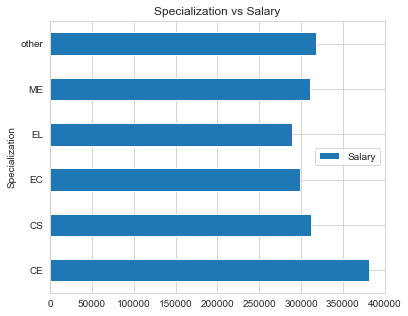

In [354]:
SpclSalAvg = spcl.groupby(['Specialization']).mean()
#mycols = list(islice(cycle(['b', 'g']), None, len(SpclSalAvg)))
SpclSalAvg.plot(kind='barh', title = 'Specialization vs Salary', figsize =(6,5))

Against the belief that a specialisation in computer science is the highest paying field, But the above plot shows there is no much difference.And there are more people for CS Branch.